In [ ]:
from tensorflow.keras.models import load_model
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score, roc_auc_score, RocCurveDisplay, classification_report
import numpy as np

In [6]:
test = pd.read_csv("../Data/Test.csv")
model_loc = "../Models/RFC_model.sav"
scaler_loc = "../tools/power_transform.sav"
model = pickle.load(open(model_loc,'rb'))
scaler = pickle.load(open(scaler_loc, 'rb'))

C:\Users\ML_USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\ML_USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PowerTransformer from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [7]:
X = test.iloc[:,1:]
y = X.pop("CLASS")

X_test_scaled = scaler.transform(X)

In [19]:
pred = model.predict_proba(X_test_scaled)[:,1]

In [20]:
pred.shape

(2385,)

In [21]:
roc_auc_score(y, pred)

0.9811043134266536

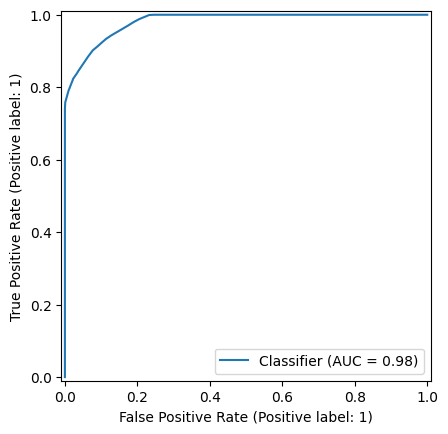

In [22]:
RocCurveDisplay.from_predictions(y, pred)

In [23]:
report = classification_report(y,np.round(pred), output_dict=True)
pd.DataFrame(report).T

,precision,recall,f1-score,support
0,0.906122,0.886228,0.896065,1002.000000
1,0.918861,0.933478,0.926112,1383.000000
accuracy,0.913627,0.913627,0.913627,0.913627
macro avg,0.912492,0.909853,0.911088,2385.000000
weighted avg,0.913509,0.913627,0.913488,2385.000000
